In [1]:
import pandas as pd
import numpy as py

In [2]:
df = pd.read_csv('mpg.csv')

In [3]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


โดย default มันจะตั้งค่า aggregate เป็น

In [11]:
df.pivot_table(index='class', columns='drv', values='model')

TypeError: agg function failed [how->mean,dtype->object]

In [5]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count')

drv,4,f,r
class,,,
2seater,NaN,NaN,5.0
compact,12.0,35.0,NaN
midsize,3.0,38.0,NaN
minivan,NaN,11.0,NaN
pickup,33.0,NaN,NaN
subcompact,4.0,22.0,9.0
suv,51.0,NaN,11.0


In [6]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0)

drv,4,f,r
class,,,
2seater,0,0,5
compact,12,35,0
midsize,3,38,0
minivan,0,11,0
pickup,33,0,0
subcompact,4,22,9
suv,51,0,11


In [7]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0,
              margins=True)

drv,4,f,r,All
class,,,,
2seater,0,0,5,5
compact,12,35,0,47
midsize,3,38,0,41
minivan,0,11,0,11
pickup,33,0,0,33
subcompact,4,22,9,35
suv,51,0,11,62
All,103,106,25,234


In [8]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0,
              margins=True, margins_name='Grand Total')

drv,4,f,r,Grand Total
class,,,,
2seater,0,0,5,5
compact,12,35,0,47
midsize,3,38,0,41
minivan,0,11,0,11
pickup,33,0,0,33
subcompact,4,22,9,35
suv,51,0,11,62
Grand Total,103,106,25,234


In [9]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0,
              margins=True, margins_name='Grand Total').astype(int)

drv,4,f,r,Grand Total
class,,,,
2seater,0,0,5,5
compact,12,35,0,47
midsize,3,38,0,41
minivan,0,11,0,11
pickup,33,0,0,33
subcompact,4,22,9,35
suv,51,0,11,62
Grand Total,103,106,25,234


<Axes: xlabel='class'>

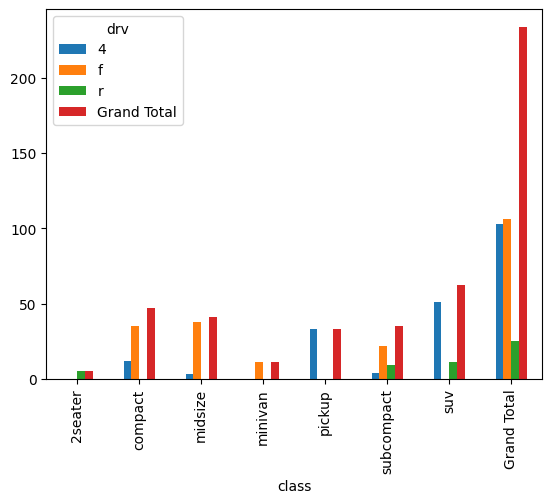

In [10]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0,
              margins=True, margins_name='Grand Total').astype(int).plot(kind='bar')